In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
from matplotlib.colorbar import ColorbarBase

In [5]:
dir = "/tf/notebooks/schnemau/xAI_stroke_3d/data/"
cib = pd.read_csv(dir + "all_tab_results_CIB_M2.csv")
ciblsx = pd.read_csv(dir + "all_tab_results_CIBLSX_M3.csv")

# Classification results tables for paper

In [6]:
merged_df = pd.merge(cib, ciblsx, on='p_id', suffixes=('_cib', '_ciblsx'))

## Comparison of class 1 probabilities

### equal weighted CIB vs CIB_LSX

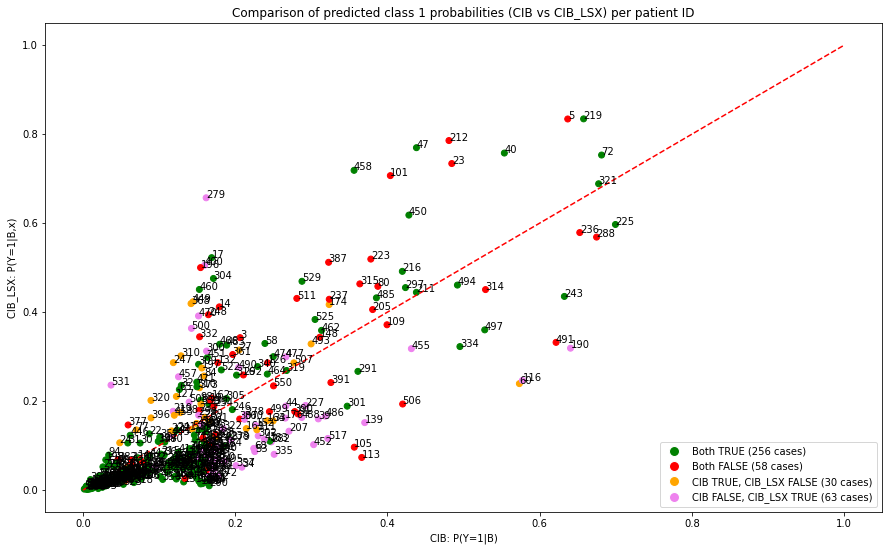

In [26]:
# Merge dataframes on 'p_id'
merged_df = pd.merge(cib, ciblsx, on='p_id', suffixes=('_cib', '_ciblsx'))

# Increase the figure size
plt.figure(figsize=(15, 9))

# Define colors based on conditions
colors = np.where((merged_df['pred_correct_cib'] & merged_df['pred_correct_ciblsx']), 'green',
                  np.where(~(merged_df['pred_correct_cib'] | merged_df['pred_correct_ciblsx']), 'red',
                           np.where((merged_df['pred_correct_cib'] & ~merged_df['pred_correct_ciblsx']), 'orange',
                                    np.where((~merged_df['pred_correct_cib'] & merged_df['pred_correct_ciblsx']), 'violet', 'gray'))))

# Scatter plot with colors
scatter = plt.scatter(merged_df['y_pred_trafo_avg_cib'], merged_df['y_pred_trafo_avg_ciblsx'],
                      label='Cib vs Ciblsx', marker='o', color=colors)

# Add the 90-degree line in red
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.title('Comparison of predicted class 1 probabilities (CIB vs CIB_LSX) per patient ID with equal weights')
plt.xlabel('CIB: P(Y=1|B)')
plt.ylabel('CIB_LSX: P(Y=1|B,x)')

# Add patient IDs to the points
for i, txt in enumerate(merged_df['p_id']):
    plt.annotate(txt, (merged_df['y_pred_trafo_avg_cib'][i], merged_df['y_pred_trafo_avg_ciblsx'][i]))

# Create legend with count
legend_labels = {
    'Green': f'Both TRUE ({np.sum(merged_df["pred_correct_cib"] & merged_df["pred_correct_ciblsx"])} cases)',
    'Red': f'Both FALSE ({np.sum(~(merged_df["pred_correct_cib"] | merged_df["pred_correct_ciblsx"]))} cases)',
    'Orange': f'CIB TRUE, CIB_LSX FALSE ({np.sum(merged_df["pred_correct_cib"] & ~merged_df["pred_correct_ciblsx"])} cases)',
    'Violet': f'CIB FALSE, CIB_LSX TRUE ({np.sum(~merged_df["pred_correct_cib"] & merged_df["pred_correct_ciblsx"])} cases)'}

legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                   for color, label in legend_labels.items()]

plt.legend(handles=legend_elements, loc='lower right')

# Show the plot
plt.show()

In [25]:
# Erstellen der Kreuztabelle
cross_tab = pd.crosstab(merged_df['y_pred_class_avg_cib'], merged_df['y_pred_class_avg_ciblsx'], margins=True, margins_name="Total")

# Prozentuale Anteile berechnen
cross_tab_percent = cross_tab / cross_tab.loc["Total", "Total"] * 100

# Ausgabe der Kreuztabelle
print("Cross-tabulation of Predicted Classes:")
print(cross_tab)


Cross-tabulation of Predicted Classes:
y_pred_class_avg_ciblsx    0    1  Total
y_pred_class_avg_cib                    
0                        242   33    275
1                         60   72    132
Total                    302  105    407


### tuned weighted CIB vs CIB_LSX

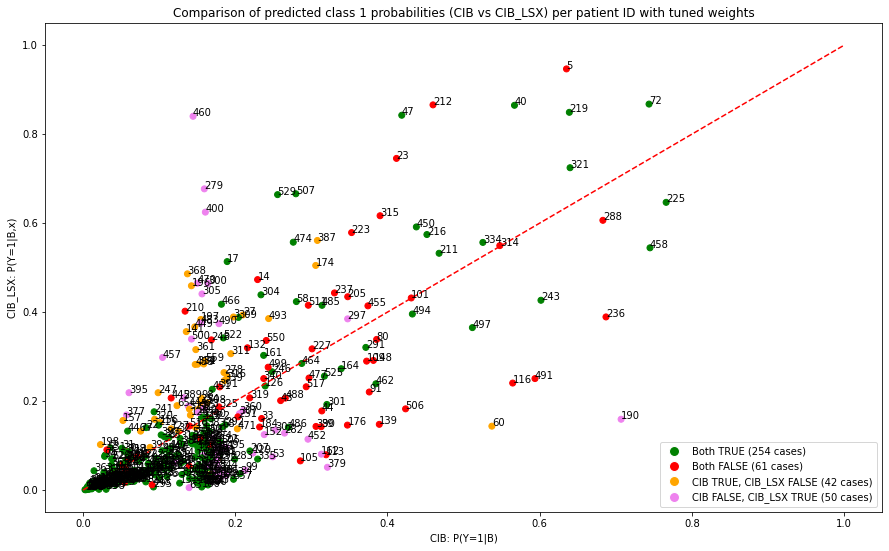

In [39]:
# Increase the figure size
plt.figure(figsize=(15, 9))

# Define colors based on conditions
colors = np.where((merged_df['pred_correct_w_cib'] & merged_df['pred_correct_w_ciblsx']), 'green',
                  np.where(~(merged_df['pred_correct_w_cib'] | merged_df['pred_correct_w_ciblsx']), 'red',
                           np.where((merged_df['pred_correct_w_cib'] & ~merged_df['pred_correct_w_ciblsx']), 'orange',
                                    np.where((~merged_df['pred_correct_w_cib'] & merged_df['pred_correct_w_ciblsx']), 'violet', 'gray'))))

# Scatter plot with colors
scatter = plt.scatter(merged_df['y_pred_trafo_avg_w_cib'], merged_df['y_pred_trafo_avg_w_ciblsx'],
                      label='weighted Cib vs Ciblsx', marker='o', color=colors)

# Add the 90-degree line in red
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.title('Comparison of predicted class 1 probabilities (CIB vs CIB_LSX) per patient ID with tuned weights')
plt.xlabel('CIB: P(Y=1|B)')
plt.ylabel('CIB_LSX: P(Y=1|B,x)')

# Add patient IDs to the points
for i, txt in enumerate(merged_df['p_id']):
    plt.annotate(txt, (merged_df['y_pred_trafo_avg_w_cib'][i], merged_df['y_pred_trafo_avg_w_ciblsx'][i]))

# Create legend with count
legend_labels = {
    'Green': f'Both TRUE ({np.sum(merged_df["pred_correct_w_cib"] & merged_df["pred_correct_w_ciblsx"])} cases)',
    'Red': f'Both FALSE ({np.sum(~(merged_df["pred_correct_w_cib"] | merged_df["pred_correct_w_ciblsx"]))} cases)',
    'Orange': f'CIB TRUE, CIB_LSX FALSE ({np.sum(merged_df["pred_correct_w_cib"] & ~merged_df["pred_correct_w_ciblsx"])} cases)',
    'Violet': f'CIB FALSE, CIB_LSX TRUE ({np.sum(~merged_df["pred_correct_w_cib"] & merged_df["pred_correct_w_ciblsx"])} cases)'}

legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                   for color, label in legend_labels.items()]

plt.legend(handles=legend_elements, loc='lower right')

# Show the plot
plt.show()

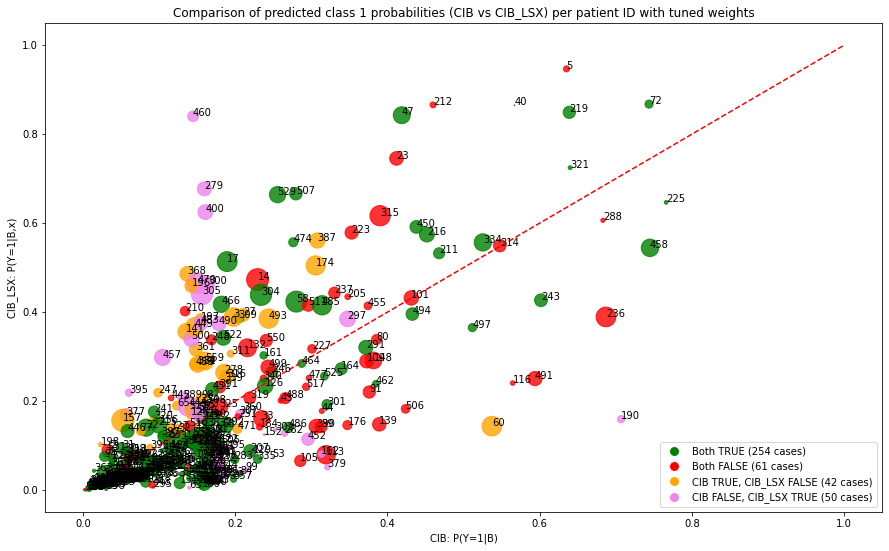

In [56]:
# Increase the figure size
plt.figure(figsize=(15, 9))

# Define colors based on conditions
colors = np.where((merged_df['pred_correct_w_cib'] & merged_df['pred_correct_w_ciblsx']), 'green',
                  np.where(~(merged_df['pred_correct_w_cib'] | merged_df['pred_correct_w_ciblsx']), 'red',
                           np.where((merged_df['pred_correct_w_cib'] & ~merged_df['pred_correct_w_ciblsx']), 'orange',
                                    np.where((~merged_df['pred_correct_w_cib'] & merged_df['pred_correct_w_ciblsx']), 'violet', 'gray'))))

# Scatter plot with size based on uncertainties
scatter = plt.scatter(merged_df['y_pred_trafo_avg_w_cib'], merged_df['y_pred_trafo_avg_w_ciblsx'],
                      label='weighted Cib vs Ciblsx', marker='o', c=colors, s=merged_df['y_pred_unc_w_ciblsx'] * 500, alpha=0.8)

# Add the 90-degree line in red
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.title('Comparison of predicted class 1 probabilities (CIB vs CIB_LSX) per patient ID with tuned weights')
plt.xlabel('CIB: P(Y=1|B)')
plt.ylabel('CIB_LSX: P(Y=1|B,x)')


# Add patient IDs to the points
for i, txt in enumerate(merged_df['p_id']):
    plt.annotate(txt, (merged_df['y_pred_trafo_avg_w_cib'][i], merged_df['y_pred_trafo_avg_w_ciblsx'][i]))

# Create legend with count
legend_labels = {
    'Green': f'Both TRUE ({np.sum(merged_df["pred_correct_w_cib"] & merged_df["pred_correct_w_ciblsx"])} cases)',
    'Red': f'Both FALSE ({np.sum(~(merged_df["pred_correct_w_cib"] | merged_df["pred_correct_w_ciblsx"]))} cases)',
    'Orange': f'CIB TRUE, CIB_LSX FALSE ({np.sum(merged_df["pred_correct_w_cib"] & ~merged_df["pred_correct_w_ciblsx"])} cases)',
    'Violet': f'CIB FALSE, CIB_LSX TRUE ({np.sum(~merged_df["pred_correct_w_cib"] & merged_df["pred_correct_w_ciblsx"])} cases)'}

legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                   for color, label in legend_labels.items()]

plt.legend(handles=legend_elements, loc='lower right')

# Show the plot
plt.show()


### equal weighted CIB_LSX vs. tuned weighted CIB_LSX 

Cross-tabulation of Predicted Classes:
y_pred_class_avg_w_ciblsx    0    1  Total
y_pred_class_avg_ciblsx                   
0                          265   37    302
1                           16   89    105
Total                      281  126    407

Cross-tabulation of Predicted Classes (Percentage):
y_pred_class_avg_w_ciblsx          0          1       Total
y_pred_class_avg_ciblsx                                    
0                          65.110565   9.090909   74.201474
1                           3.931204  21.867322   25.798526
Total                      69.041769  30.958231  100.000000


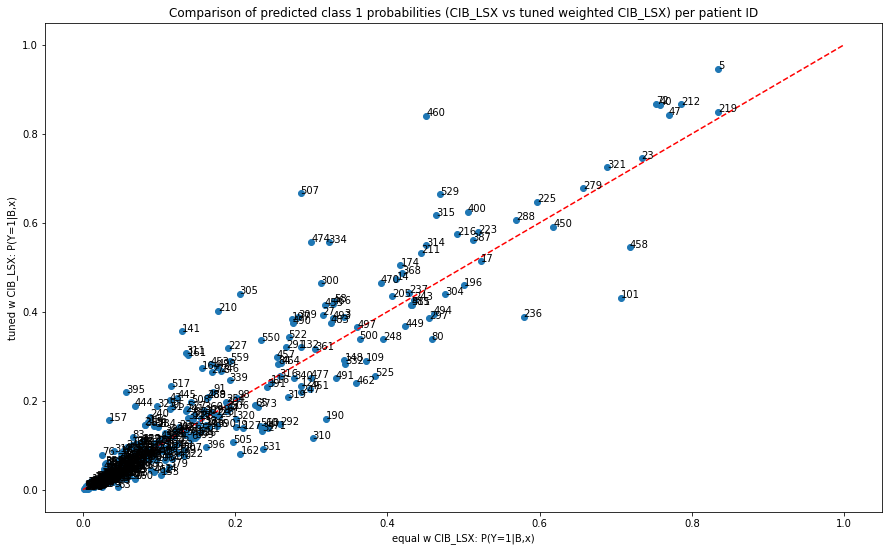

In [69]:
# Increase the figure size
plt.figure(figsize=(15, 9))

# Scatter plot
plt.scatter(merged_df['y_pred_trafo_avg_ciblsx'], merged_df['y_pred_trafo_avg_w_ciblsx'], label='CIB_LSX vs Tuned CIB_LSX', marker='o')

# Add the 90-degree line in red
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.title('Comparison of predicted class 1 probabilities (CIB_LSX vs tuned weighted CIB_LSX) per patient ID')
plt.xlabel('equal w CIB_LSX: P(Y=1|B,x)')
plt.ylabel('tuned w CIB_LSX: P(Y=1|B,x)')

# Add patient IDs to the points
for i, txt in enumerate(merged_df['p_id']):
    plt.annotate(txt, (merged_df['y_pred_trafo_avg_ciblsx'][i], merged_df['y_pred_trafo_avg_w_ciblsx'][i]))


# Erstellen der Kreuztabelle
cross_tab = pd.crosstab(merged_df['y_pred_class_avg_ciblsx'], merged_df['y_pred_class_avg_w_ciblsx'], margins=True, margins_name="Total")

# Prozentuale Anteile berechnen
cross_tab_percent = cross_tab / cross_tab.loc["Total", "Total"] * 100

# Ausgabe der Kreuztabelle
print("Cross-tabulation of Predicted Classes:")
print(cross_tab)
print("\nCross-tabulation of Predicted Classes (Percentage):")
print(cross_tab_percent)

### equal weighted CIB vs. tuned weighted CIB 

# Real Science

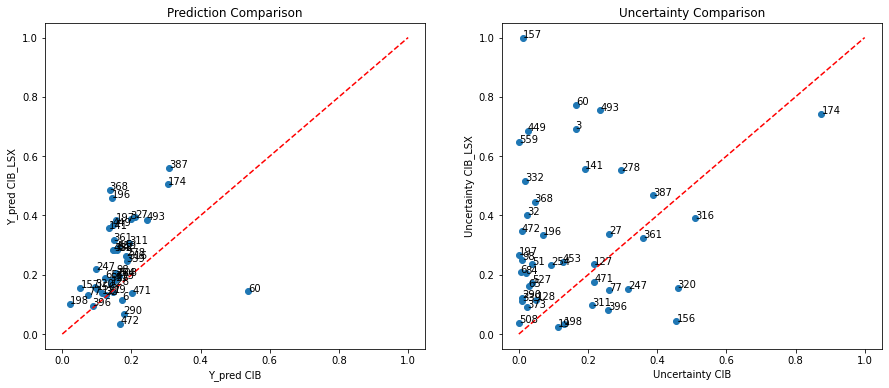

In [84]:
subset_df = merged_df[(merged_df['pred_correct_w_cib'] == True) & (merged_df['pred_correct_w_ciblsx'] == False)]
# Resetting the index of the subset DataFrame
subset_df = subset_df.reset_index(drop=True)

# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Scatter plot for y_pred
axs[0].scatter(subset_df['y_pred_trafo_avg_w_cib'], subset_df['y_pred_trafo_avg_w_ciblsx'])
axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[0].set_title('Prediction Comparison')
axs[0].set_xlabel('Y_pred CIB')
axs[0].set_ylabel('Y_pred CIB_LSX')

# Plot 2: Scatter plot for uncertainties
axs[1].scatter(subset_df['y_pred_unc_w_cib'], subset_df['y_pred_unc_w_ciblsx'])
axs[1].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[1].set_title('Uncertainty Comparison')
axs[1].set_xlabel('Uncertainty CIB')
axs[1].set_ylabel('Uncertainty CIB_LSX')

# Add patient IDs to the points
for i, txt in enumerate(subset_df['p_id']):
    axs[0].annotate(txt, (subset_df['y_pred_trafo_avg_w_cib'][i], subset_df['y_pred_trafo_avg_w_ciblsx'][i]))
    axs[1].annotate(txt, (subset_df['y_pred_unc_w_cib'][i], subset_df['y_pred_unc_w_ciblsx'][i]))

# Show the plots
plt.show()

In [85]:
print(np.mean(subset_df['y_pred_unc_w_cib']))
print(np.mean(subset_df['y_pred_unc_w_ciblsx']))

0.16049391705872734
0.32332564106757866


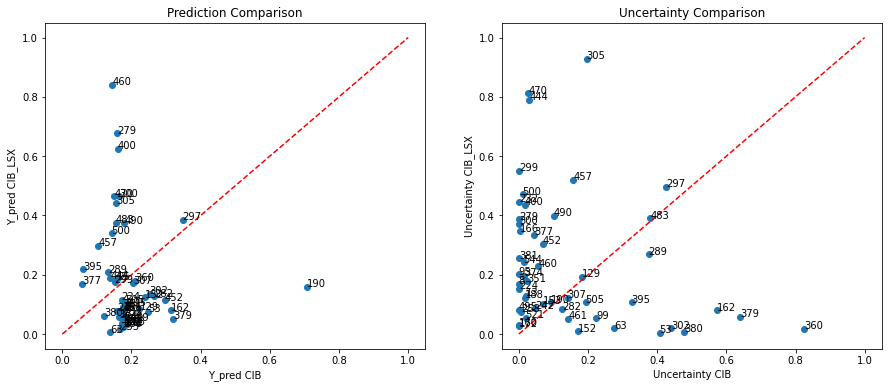

In [86]:
subset_df = merged_df[(merged_df['pred_correct_w_cib'] == False) & (merged_df['pred_correct_w_ciblsx'] == True)]
# Resetting the index of the subset DataFrame
subset_df = subset_df.reset_index(drop=True)

# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Scatter plot for y_pred
axs[0].scatter(subset_df['y_pred_trafo_avg_w_cib'], subset_df['y_pred_trafo_avg_w_ciblsx'])
axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[0].set_title('Prediction Comparison')
axs[0].set_xlabel('Y_pred CIB')
axs[0].set_ylabel('Y_pred CIB_LSX')

# Plot 2: Scatter plot for uncertainties
axs[1].scatter(subset_df['y_pred_unc_w_cib'], subset_df['y_pred_unc_w_ciblsx'])
axs[1].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[1].set_title('Uncertainty Comparison')
axs[1].set_xlabel('Uncertainty CIB')
axs[1].set_ylabel('Uncertainty CIB_LSX')


# Add patient IDs to the points
for i, txt in enumerate(subset_df['p_id']):
    axs[0].annotate(txt, (subset_df['y_pred_trafo_avg_w_cib'][i], subset_df['y_pred_trafo_avg_w_ciblsx'][i]))
    axs[1].annotate(txt, (subset_df['y_pred_unc_w_cib'][i], subset_df['y_pred_unc_w_ciblsx'][i]))


# Show the plots
plt.show()

In [83]:
print(np.mean(subset_df['y_pred_unc_w_cib']))
print(np.mean(subset_df['y_pred_unc_w_ciblsx']))

0.14727608091687178
0.23265723207303765
